# Cleaning raw data

No need to run these cells

In [ ]:
import csv
import json
from datetime import datetime

# Load the JSON data from the file (run_results.json)
with open('run_results.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Define the CSV columns
fields = [
    "post_title", "post_url", "likes", "post_year", "post_month",
    "comment_body", "comment_likes", "comment_year", "comment_month", "source"
]

# Open the CSV file for writing
with open('output.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=fields)

    # Write header row
    writer.writeheader()

    # Loop through the data and convert to CSV
    for entry in data["name"]:
        # Extract the date of posting
        try:
            post_date = datetime.strptime(entry["dateposted"], "%B %d, %Y")
        except KeyError:
            post_date = None

        # Extract the date of experience if it exists and is in the correct format
        try:
            # Check if the dateofexperience field starts with "Date of experience:"
            if entry.get("dateofexperience", "").startswith("Date of experience:"):
                experience_date = datetime.strptime(entry["dateofexperience"], "Date of experience: %B %d, %Y")
            else:
                experience_date = None
        except ValueError as e:
            print(f"Skipping invalid date format in 'dateofexperience': {entry.get('dateofexperience')}")
            experience_date = None

        # Safely get the "explanation" field (will return None if it doesn't exist)
        comment_body = entry.get("explanation", "")

        # Create a row for CSV
        row = {
            "post_title": entry.get("query", ""),
            "post_url": entry.get("query_url", ""),
            "likes": 0,  # Static value as per your specification
            "post_year": post_date.year if post_date else None,
            "post_month": post_date.strftime("%B") if post_date else None,
            "comment_body": comment_body,
            "comment_likes": entry.get("dateofexperience", ""),
            "comment_year": experience_date.year if experience_date else None,
            "comment_month": experience_date.strftime("%B") if experience_date else None,
            "source": "sitejabber"
        }

        # Write row to CSV
        writer.writerow(row)

print("CSV file 'output.csv' created successfully.")


FileNotFoundError: [Errno 2] No such file or directory: 'run_results.json'

In [ ]:
import csv
import json
from datetime import datetime

# Load the JSON data from the file (run_results.json)
with open('run_results.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Define the CSV columns
fields = [
    "post_title", "post_url", "likes", "post_year", "post_month",
    "comment_body", "comment_likes", "comment_year", "comment_month",
    "source", "place", "review_count", "helpful_votes"
]

# Open the CSV file for writing
with open('output.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=fields)

    # Write header row
    writer.writeheader()

    # Loop through the data and convert to CSV
    for entry in data["name"]:
        # Extract the date of posting
        try:
            post_date = datetime.strptime(entry["dateposted"], "%B %d, %Y")
        except KeyError:
            post_date = None

        # Extract the date of experience if it exists and is in the correct format
        try:
            if entry.get("dateofexperience", "").startswith("Date of experience:"):
                experience_date = datetime.strptime(entry["dateofexperience"], "Date of experience: %B %d, %Y")
            else:
                experience_date = None
        except ValueError as e:
            print(f"Skipping invalid date format in 'dateofexperience': {entry.get('dateofexperience')}")
            experience_date = None

        # Safely get the "explanation" field (will return None if it doesn't exist)
        comment_body = entry.get("explanation", "")

        # Parse the "placereview" field to extract place, review count, and helpful votes
        placereview = entry.get("placereview", "")
        place = review_count = helpful_votes = None

        if placereview:
            # Split the placereview string into parts
            parts = placereview.split('\n')
            if len(parts) >= 3:
                place = parts[0]  # First part: Place (e.g., Kansas)
                review_count = parts[1].strip()  # Second part: Reviews (e.g., 1 review)
                helpful_votes = parts[2].strip()  # Third part: Helpful votes (e.g., 0 helpful votes)

        # Create a row for CSV
        row = {
            "post_title": entry.get("query", ""),
            "post_url": entry.get("query_url", ""),
            "likes": 0,  # Static value as per your specification
            "post_year": post_date.year if post_date else None,
            "post_month": post_date.strftime("%B") if post_date else None,
            "comment_body": comment_body,
            "comment_likes": entry.get("dateofexperience", ""),
            "comment_year": experience_date.year if experience_date else None,
            "comment_month": experience_date.strftime("%B") if experience_date else None,
            "source": "sitejabber",
            "place": place,
            "review_count": review_count,
            "helpful_votes": helpful_votes
        }

        # Write row to CSV
        writer.writerow(row)

print("CSV file 'output1.csv' created successfully.")


CSV file 'output1.csv' created successfully.


In [ ]:
import pandas as pd

df = pd.read_csv('output.csv')
df.head()

,post_title,post_url,likes,post_year,post_month,comment_body,comment_likes,comment_year,comment_month,source,place,review_count,helpful_votes
0,Wanted refund on installation,https://www.sitejabber.com/reviews/costco.com#...,0,2025,January,Costco would not install oven (installer feign...,"Date of experience: January 26, 2025",2025.0,January,sitejabber,Kansas,1 review,0 helpful votes
1,"First soup was great, scond was really really bad",https://www.sitejabber.com/reviews/costco.com#...,0,2025,February,Costco has some of the best products and I am ...,"Date of experience: January 30, 2025",2025.0,January,sitejabber,New York,1 review,0 helpful votes
2,Costco calls cops on gold buyer,https://www.sitejabber.com/reviews/costco.com#...,0,2024,September,Wanted a refund on my membership that is a 100...,"Date of experience: September 9, 2024",2024.0,September,sitejabber,Michigan,2 reviews,35 helpful votes
3,Costly Delivery Dilemma,https://www.sitejabber.com/reviews/costco.com#...,0,2024,April,Costco's delivery service left me feeling chea...,"Date of experience: April 26, 2024",2024.0,April,sitejabber,Armenia,27 reviews,11 helpful votes
4,A Shopper's Paradise at Costco,https://www.sitejabber.com/reviews/costco.com#...,0,2024,April,"Shopping at Costco is always a delight, thanks...","Date of experience: April 22, 2024",2024.0,April,sitejabber,Armenia,28 reviews,0 helpful votes


In [ ]:
import pandas as pd

# Load the dataset from output.csv
df = pd.read_csv('output.csv')

# Split 'date_experience' into date_exp, month_exp, and year_exp
df['date_exp'] = pd.to_datetime(df['comment_likes'].str.replace('Date of experience: ', '', regex=False), errors='coerce')
df['month_exp'] = df['date_exp'].dt.month_name()
df['year_exp'] = df['date_exp'].dt.year

# Clean 'review_count' column by removing the word "review" and keeping only the number
# Ensure that NaN values are handled before applying .split()
df['review_count'] = df['review_count'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else 0)

# Clean 'helpful_votes' column by removing the word "helpful" and keeping only the number
# Ensure that NaN values are handled before applying .split()
df['helpful_votes'] = df['helpful_votes'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else 0)

# Now, let's remove the old 'date_experience' column if it exists
if 'date_experience' in df.columns:
    df = df.drop(columns=['date_experience'])

# Print the cleaned dataframe
print(df)

# Save the cleaned data to a new CSV
df.to_csv('cleaned_output.csv', index=False)

print("Data cleaned and saved successfully as 'cleaned_output.csv'!")


                                             post_title  \
0                         Wanted refund on installation   
1     First soup was great, scond was really really bad   
2                       Costco calls cops on gold buyer   
3                               Costly Delivery Dilemma   
4                        A Shopper's Paradise at Costco   
...                                                 ...   
1288             Fidomobile ét la connexion avec cotsco   
1289                                   Meilleur service   
1290                            Great customer service!   
1291                                                 :)   
1292                                        Great store   

                                               post_url  likes  post_year  \
0     https://www.sitejabber.com/reviews/costco.com#...      0       2025   
1     https://www.sitejabber.com/reviews/costco.com#...      0       2025   
2     https://www.sitejabber.com/reviews/costco.com#...     

#start here

# Cleaned dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('cleaned_output.csv')
df.head()

,post_title,post_url,likes,post_year,post_month,comment_body,comment_likes,comment_year,comment_month,source,place,review_count,helpful_votes,date_exp,month_exp,year_exp
0,Wanted refund on installation,https://www.sitejabber.com/reviews/costco.com#...,0,2025,January,Costco would not install oven (installer feign...,"Date of experience: January 26, 2025",2025.0,January,sitejabber,Kansas,1,0,2025-01-26,January,2025.0
1,"First soup was great, scond was really really bad",https://www.sitejabber.com/reviews/costco.com#...,0,2025,February,Costco has some of the best products and I am ...,"Date of experience: January 30, 2025",2025.0,January,sitejabber,New York,1,0,2025-01-30,January,2025.0
2,Costco calls cops on gold buyer,https://www.sitejabber.com/reviews/costco.com#...,0,2024,September,Wanted a refund on my membership that is a 100...,"Date of experience: September 9, 2024",2024.0,September,sitejabber,Michigan,2,35,2024-09-09,September,2024.0
3,Costly Delivery Dilemma,https://www.sitejabber.com/reviews/costco.com#...,0,2024,April,Costco's delivery service left me feeling chea...,"Date of experience: April 26, 2024",2024.0,April,sitejabber,Armenia,27,11,2024-04-26,April,2024.0
4,A Shopper's Paradise at Costco,https://www.sitejabber.com/reviews/costco.com#...,0,2024,April,"Shopping at Costco is always a delight, thanks...","Date of experience: April 22, 2024",2024.0,April,sitejabber,Armenia,28,0,2024-04-22,April,2024.0


##dropping columns

In [3]:
df = df.drop(columns=['comment_likes', 'comment_year', 'comment_month','likes','month_exp','year_exp'])


In [4]:
df

,post_title,post_url,post_year,post_month,comment_body,source,place,review_count,helpful_votes,date_exp
0,Wanted refund on installation,https://www.sitejabber.com/reviews/costco.com#...,2025,January,Costco would not install oven (installer feign...,sitejabber,Kansas,1,0,2025-01-26
1,"First soup was great, scond was really really bad",https://www.sitejabber.com/reviews/costco.com#...,2025,February,Costco has some of the best products and I am ...,sitejabber,New York,1,0,2025-01-30
2,Costco calls cops on gold buyer,https://www.sitejabber.com/reviews/costco.com#...,2024,September,Wanted a refund on my membership that is a 100...,sitejabber,Michigan,2,35,2024-09-09
3,Costly Delivery Dilemma,https://www.sitejabber.com/reviews/costco.com#...,2024,April,Costco's delivery service left me feeling chea...,sitejabber,Armenia,27,11,2024-04-26
4,A Shopper's Paradise at Costco,https://www.sitejabber.com/reviews/costco.com#...,2024,April,"Shopping at Costco is always a delight, thanks...",sitejabber,Armenia,28,0,2024-04-22
...,...,...,...,...,...,...,...,...,...,...
1288,Fidomobile ét la connexion avec cotsco,https://www.sitejabber.com/reviews/costco.com#917,2017,March,Sans préjudice je vient d'être choqué par la f...,sitejabber,Canada,1,1,2017-03-13
1289,Meilleur service,https://www.sitejabber.com/reviews/costco.com#...,2022,January,"Je suis toujours satisfaite de Costco, les qua...",sitejabber,Canada,2,0,2022-01-18
1290,Great customer service!,https://www.sitejabber.com/reviews/costco.com#186,2015,May,NaN,sitejabber,Canada,3,1,2015-05-18
1291,:),https://www.sitejabber.com/reviews/costco.com#87,2015,February,NaN,sitejabber,NaN,0,0,2015-02-06


# Tokenization

In [5]:
def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]  # Return tokenized words as a list


In [6]:

import spacy
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Tokenization function (processing the 'comment_body' column)
def tokenize_text(text):
    # Ensure the input is a string (if it's NaN or float, convert to empty string)
    if not isinstance(text, str):
        text = str(text)  # Convert any non-string input to a string (including NaN/float)

    doc = nlp(text)
    return [token.text for token in doc if not token.is_stop and not token.is_punct]  # Ignore stopwords and punctuation

# Apply tokenization on the 'comment_body' column of the dataset
df["token"] = df["comment_body"].apply(tokenize_text)

# Calculate the length of tokenized comments
token_lengths = df["token"].apply(len)

# Calculate mean and standard deviation of token lengths
mean_length = token_lengths.mean()
std_dev = token_lengths.std()

# Set the max sequence length as mean + 1 std deviation (rounded)
MAX_SEQUENCE_LENGTH = int(round(mean_length + std_dev))
print(f"Determined Max Sequence Length: {MAX_SEQUENCE_LENGTH}")

# Create a word index dictionary where each unique word is assigned a unique index
word_index = {word: i+1 for i, word in enumerate(set(word for tokens in df["token"] for word in tokens))}

# Convert each tokenized comment into numerical tokens (i.e., word index)
df["token_numeric"] = df["token"].apply(lambda x: [word_index.get(word, 0) for word in x])

# Pad sequences to ensure that all tokenized comments have the same length (MAX_SEQUENCE_LENGTH)
df["token_padded"] = list(pad_sequences(df["token_numeric"], maxlen=MAX_SEQUENCE_LENGTH, padding="post"))

# Show a few examples of the processed data
print(df[["comment_body", "token", "token_numeric", "token_padded"]].head())


Determined Max Sequence Length: 71
                                        comment_body  \
0  Costco would not install oven (installer feign...   
1  Costco has some of the best products and I am ...   
2  Wanted a refund on my membership that is a 100...   
3  Costco's delivery service left me feeling chea...   
4  Shopping at Costco is always a delight, thanks...   

                                               token  \
0  [Costco, install, oven, installer, feigned, pr...   
1  [Costco, best, products, week, picked, Creamy,...   
2  [Wanted, refund, membership, 100, guarantee, d...   
3  [Costco, delivery, service, left, feeling, che...   
4  [Shopping, Costco, delight, thanks, unbeatable...   

                                       token_numeric  \
0  [6609, 5811, 6354, 2821, 6294, 1283, 4983, 686...   
1  [6609, 74, 5705, 1502, 1548, 1582, 2698, 6104,...   
2  [1599, 5990, 3054, 7197, 4565, 6581, 540, 4968...   
3  [6609, 6618, 821, 6599, 1785, 1478, 3806, 5838...   
4  [1111, 6

In [7]:
df

,post_title,post_url,post_year,post_month,comment_body,source,place,review_count,helpful_votes,date_exp,token,token_numeric,token_padded
0,Wanted refund on installation,https://www.sitejabber.com/reviews/costco.com#...,2025,January,Costco would not install oven (installer feign...,sitejabber,Kansas,1,0,2025-01-26,"[Costco, install, oven, installer, feigned, pr...","[6609, 5811, 6354, 2821, 6294, 1283, 4983, 686...","[6609, 5811, 6354, 2821, 6294, 1283, 4983, 686..."
1,"First soup was great, scond was really really bad",https://www.sitejabber.com/reviews/costco.com#...,2025,February,Costco has some of the best products and I am ...,sitejabber,New York,1,0,2025-01-30,"[Costco, best, products, week, picked, Creamy,...","[6609, 74, 5705, 1502, 1548, 1582, 2698, 6104,...","[6609, 74, 5705, 1502, 1548, 1582, 2698, 6104,..."
2,Costco calls cops on gold buyer,https://www.sitejabber.com/reviews/costco.com#...,2024,September,Wanted a refund on my membership that is a 100...,sitejabber,Michigan,2,35,2024-09-09,"[Wanted, refund, membership, 100, guarantee, d...","[1599, 5990, 3054, 7197, 4565, 6581, 540, 4968...","[4357, 1100, 5359, 3059, 6215, 2766, 369, 5047..."
3,Costly Delivery Dilemma,https://www.sitejabber.com/reviews/costco.com#...,2024,April,Costco's delivery service left me feeling chea...,sitejabber,Armenia,27,11,2024-04-26,"[Costco, delivery, service, left, feeling, che...","[6609, 6618, 821, 6599, 1785, 1478, 3806, 5838...","[6609, 6618, 821, 6599, 1785, 1478, 3806, 5838..."
4,A Shopper's Paradise at Costco,https://www.sitejabber.com/reviews/costco.com#...,2024,April,"Shopping at Costco is always a delight, thanks...",sitejabber,Armenia,28,0,2024-04-22,"[Shopping, Costco, delight, thanks, unbeatable...","[1111, 6609, 1479, 3817, 2535, 6416, 2975, 570...","[1111, 6609, 1479, 3817, 2535, 6416, 2975, 570..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,Fidomobile ét la connexion avec cotsco,https://www.sitejabber.com/reviews/costco.com#917,2017,March,Sans préjudice je vient d'être choqué par la f...,sitejabber,Canada,1,1,2017-03-13,"[Sans, préjudice, je, vient, d'être, choqué, p...","[3355, 5469, 2537, 1048, 4602, 3585, 2129, 273...","[3532, 1, 4069, 2288, 38, 5265, 4681, 5655, 41..."
1289,Meilleur service,https://www.sitejabber.com/reviews/costco.com#...,2022,January,"Je suis toujours satisfaite de Costco, les qua...",sitejabber,Canada,2,0,2022-01-18,"[Je, suis, toujours, satisfaite, de, Costco, l...","[2572, 7273, 5480, 153, 7082, 6609, 5691, 3140...","[2572, 7273, 5480, 153, 7082, 6609, 5691, 3140..."
1290,Great customer service!,https://www.sitejabber.com/reviews/costco.com#186,2015,May,NaN,sitejabber,Canada,3,1,2015-05-18,[nan],[3847],"[3847, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1291,:),https://www.sitejabber.com/reviews/costco.com#87,2015,February,NaN,sitejabber,NaN,0,0,2015-02-06,[nan],[3847],"[3847, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [8]:
!pip uninstall -y scipy gensim
!pip install scipy==1.10.1 gensim==4.3.2

Found existing installation: scipy 1.14.1
Uninstalling scipy-1.14.1:
  Successfully uninstalled scipy-1.14.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 88.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
cvxpy 1.6.5 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompati

# After running the above cell restart the kernel

In [8]:
# Verify the versions installed

import gensim




In [9]:

from gensim import corpora


#LDA PREPRO

In [10]:
import nltk
from nltk.corpus import stopwords
from gensim import corpora

# Download NLTK stopwords if not done already
nltk.download('stopwords')

# Define stopwords list
stop_words = set(stopwords.words('english'))

# Preprocess the tokenized data: remove stopwords and other unwanted terms
df['tokens_cleaned'] = df['token'].apply(lambda x: [word for word in x if word not in stop_words])

# Create a dictionary of the cleaned tokens
dictionary = corpora.Dictionary(df['tokens_cleaned'])

# Create a bag-of-words corpus
corpus = [dictionary.doc2bow(text) for text in df['tokens_cleaned']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#LDA MODEL

In [11]:
from gensim.models import LdaModel

# Build the LDA model with 5 topics (you can adjust the number based on your dataset)
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Display the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.030*"\n" + 0.025*"Costco" + 0.009*"$" + 0.009*"delivery" + 0.006*"service"')
(1, '0.022*"Costco" + 0.018*"delivery" + 0.011*"day" + 0.008*"time" + 0.008*"called"')
(2, '0.028*"Costco" + 0.013*"\n" + 0.011*"service" + 0.010*"customer" + 0.008*"told"')
(3, '0.129*"nan" + 0.006*"Costco" + 0.005*"\n" + 0.005*"de" + 0.004*"time"')
(4, '0.028*"Costco" + 0.010*"order" + 0.010*"\n" + 0.008*"membership" + 0.008*"service"')


In [12]:
# Function to get the dominant topic and its words with their contributions
def get_topic_details(corpus, lda_model, num_top_words=5):
    topic_assignments = []
    top_words = []
    word_contributions = []

    for doc_bow in corpus:
        topic_probabilities = lda_model.get_document_topics(doc_bow)

        # Find the dominant topic and its probability
        dominant_topic, prob = max(topic_probabilities, key=lambda x: x[1])

        # Get the top words for the dominant topic
        topic_words = lda_model.get_topic_terms(dominant_topic, topn=num_top_words)

        # Extract the words and their contributions
        words = [lda_model.id2word[word_id] for word_id, prob in topic_words]
        contributions = [prob for word_id, prob in topic_words]

        topic_assignments.append(dominant_topic)
        top_words.append(", ".join(words))
        word_contributions.append(", ".join([f"{word}: {round(contrib*100, 2)}%" for word, contrib in zip(words, contributions)]))

    # Print to inspect the output
    print(f"Topic Assignments: {topic_assignments[:5]}")
    print(f"Top Words: {top_words[:5]}")
    print(f"Word Contributions: {word_contributions[:5]}")

    return topic_assignments, top_words, word_contributions  # Ensure 3 return values
# Apply the function to assign dominant topics, top words, and their contributions to the dataset
result = get_topic_details(corpus, lda_model)

# Unpack the result directly into the three variables
dominant_topics, top_words, word_contributions = result

# Now assign each list to the respective DataFrame columns
df['dominant_topic'] = dominant_topics
df['top_words'] = top_words
df['word_contributions'] = word_contributions

# Display the updated DataFrame with new columns
print(df[['comment_body', 'dominant_topic', 'top_words', 'word_contributions']].head())



Topic Assignments: [0, 4, 3, 2, 0]
Top Words: ['\n, Costco, $, delivery, service', 'Costco, order, \n, membership, service', 'nan, Costco, \n, de, time', 'Costco, \n, service, customer, told', '\n, Costco, $, delivery, service']
Word Contributions: ['\n: 2.96%, Costco: 2.53%, $: 0.93%, delivery: 0.91%, service: 0.56%', 'Costco: 2.8%, order: 1.0%, \n: 0.95%, membership: 0.82%, service: 0.78%', 'nan: 12.91%, Costco: 0.57%, \n: 0.52%, de: 0.47%, time: 0.42%', 'Costco: 2.84%, \n: 1.32%, service: 1.11%, customer: 1.01%, told: 0.79%', '\n: 2.96%, Costco: 2.53%, $: 0.93%, delivery: 0.91%, service: 0.56%']
                                        comment_body  dominant_topic  \
0  Costco would not install oven (installer feign...               0   
1  Costco has some of the best products and I am ...               4   
2  Wanted a refund on my membership that is a 100...               3   
3  Costco's delivery service left me feeling chea...               2   
4  Shopping at Costco is always a 

In [13]:
df[['comment_body', 'dominant_topic', 'top_words', 'word_contributions']].head()

,comment_body,dominant_topic,top_words,word_contributions
0,Costco would not install oven (installer feign...,0,"\n, Costco, $, delivery, service","\n: 2.96%, Costco: 2.53%, $: 0.93%, delivery: ..."
1,Costco has some of the best products and I am ...,4,"Costco, order, \n, membership, service","Costco: 2.8%, order: 1.0%, \n: 0.95%, membersh..."
2,Wanted a refund on my membership that is a 100...,3,"nan, Costco, \n, de, time","nan: 12.91%, Costco: 0.57%, \n: 0.52%, de: 0.4..."
3,Costco's delivery service left me feeling chea...,2,"Costco, \n, service, customer, told","Costco: 2.84%, \n: 1.32%, service: 1.11%, cust..."
4,"Shopping at Costco is always a delight, thanks...",0,"\n, Costco, $, delivery, service","\n: 2.96%, Costco: 2.53%, $: 0.93%, delivery: ..."


#topic modelling

In [14]:
product_keywords = [
    # Kirkland Signature Products
    "kirkland", "kirkland signature", "kirkland water", "kirkland shampoo", "kirkland conditioner",
    "kirkland dog treats", "kirkland diapers", "kirkland protein bars", "kirkland almond milk",
    "kirkland chocolate", "kirkland peanut butter", "kirkland sparkling wine", "kirkland beer",

    # Electronics & Appliances
    "smart tv", "gaming laptop", "desktop computer", "wireless earbuds", "bluetooth speaker",
    "4k tv", "oled tv", "gaming pc", "wifi router", "hard drive", "ssd", "fitness tracker",
    "keurig", "instant pot", "air fryer", "vacuum cleaner", "robot vacuum", "home theater",

    # Food & Grocery
    "organic produce", "costco pizza", "costco muffins", "rotisserie chicken", "plant-based",
    "vegan snacks", "gluten-free", "cold cuts", "frozen meals", "energy drinks", "costco pies",
    "kirkland ice cream", "pasta sauce", "granola", "nut butter", "trail mix", "frozen desserts",

    # Furniture & Home
    "living room set", "coffee table", "bar stools", "sectional sofa", "ottoman", "kitchen island",
    "costco mattresses", "adjustable bed", "bunk bed", "outdoor furniture", "patio umbrella",
    "garden decor", "lighting fixtures", "home organization", "storage bins", "closet organizers",

    # Clothing & Apparel
    "activewear", "sneakers", "boots", "winter jackets", "raincoat", "sports bras", "base layers",
    "costco jeans", "costco socks", "swim trunks", "beachwear", "costco hats", "scarves", "gloves",

    # Health & Wellness
    "immune support", "probiotics", "vitamin c", "collagen", "fish oil", "protein shakes",
    "kirkland vitamins", "essential oils", "sleep aids", "pain relief", "costco pharmacy rx",
    "hand sanitizing wipes", "home medical devices", "hearing aid batteries", "compression socks",

    # Household & Cleaning
    "all-purpose cleaner", "window cleaner", "vacuum bags", "dryer sheets", "costco mop",
    "swiffer", "garbage disposal", "air freshener spray", "costco bleach", "antibacterial wipes",
    "rechargeable batteries", "led bulbs", "smart home devices", "air filters", "costco solar lights",

    # Outdoor & Auto
    "snow tires", "all-season tires", "grilling accessories", "propane tanks", "outdoor heaters",
    "garden tools", "lawn chairs", "hammock", "camping tents", "sleeping bags", "portable cooler",
    "electric scooter", "bike accessories", "outdoor speakers", "costco kayaks", "golf equipment",
    "pool supplies", "garden hose", "power tools"
]


service_keywords = [
    # Membership & Policies
    "executive member", "gold star membership", "auto renewal", "membership refund",
    "corporate membership", "membership benefits", "price guarantee", "product recall",
    "membership downgrade", "student discount", "military discount",

    # Customer Experience
    "friendly staff", "customer satisfaction", "waiting time", "self-checkout",
    "greeter", "in-store experience", "costco support", "feedback", "customer feedback",
    "store layout", "crowd management", "complaint resolution", "in-store wifi", "cleanliness",

    # Online Shopping & Delivery
    "express delivery", "membership online", "order history", "subscription services",
    "auto-ship", "product availability", "out of stock", "online chat support",
    "costco digital", "home delivery", "scheduled delivery", "delivery slots",
    "shipping policy", "refund status",

    # Pricing & Discounts
    "seasonal sale", "holiday deals", "weekly specials", "employee discount",
    "bundle offers", "buy one get one", "cashback rewards", "reward points", "gift voucher",
    "sale event", "exclusive discount", "birthday rewards", "anniversary offer",

    # Costco Travel & Financial Services
    "vacation packages", "flight discounts", "travel insurance policy", "roadside assistance",
    "travel booking", "travel refund", "costco visa cashback", "auto insurance",
    "credit card rewards", "personal loan", "home insurance", "costco mortgage",

    # Gas Station & Automotive Services
    "fuel efficiency", "premium fuel", "diesel", "car tire installation", "alignment check",
    "emission testing", "car battery", "brake service", "oil filter", "auto parts",
    "road trip essentials", "car cleaning products", "engine diagnostic", "windshield wipers"
]

In [15]:
import spacy
import re

# Assuming your DataFrame is named df and it has a 'comment_body' column
# Example DataFrame
# df = pd.read_csv('cleaned_output.csv')  # Assuming you've already loaded your data

# Load spaCy English model for text processing
nlp = spacy.load("en_core_web_sm")

In [16]:
# Function to assign category to comments based on keyword matches
def assign_category(comment):
    comment = str(comment).lower()  # Ensure the comment is a string and lowercase it
    product_count = sum(keyword in comment for keyword in product_keywords)
    service_count = sum(keyword in comment for keyword in service_keywords)

    if product_count > service_count:
        return "Product"
    elif service_count > product_count:
        return "Service"
    else:
        return "Uncategorized"

# Apply the function to assign category to each comment in the 'comment_body' column
df['category'] = df['comment_body'].apply(assign_category)

# Show the updated DataFrame
df.head()

,post_title,post_url,post_year,post_month,comment_body,source,place,review_count,helpful_votes,date_exp,token,token_numeric,token_padded,tokens_cleaned,dominant_topic,top_words,word_contributions,category
0,Wanted refund on installation,https://www.sitejabber.com/reviews/costco.com#...,2025,January,Costco would not install oven (installer feign...,sitejabber,Kansas,1,0,2025-01-26,"[Costco, install, oven, installer, feigned, pr...","[6609, 5811, 6354, 2821, 6294, 1283, 4983, 686...","[6609, 5811, 6354, 2821, 6294, 1283, 4983, 686...","[Costco, install, oven, installer, feigned, pr...",0,"\n, Costco, $, delivery, service","\n: 2.96%, Costco: 2.53%, $: 0.93%, delivery: ...",Uncategorized
1,"First soup was great, scond was really really bad",https://www.sitejabber.com/reviews/costco.com#...,2025,February,Costco has some of the best products and I am ...,sitejabber,New York,1,0,2025-01-30,"[Costco, best, products, week, picked, Creamy,...","[6609, 74, 5705, 1502, 1548, 1582, 2698, 6104,...","[6609, 74, 5705, 1502, 1548, 1582, 2698, 6104,...","[Costco, best, products, week, picked, Creamy,...",4,"Costco, order, \n, membership, service","Costco: 2.8%, order: 1.0%, \n: 0.95%, membersh...",Uncategorized
2,Costco calls cops on gold buyer,https://www.sitejabber.com/reviews/costco.com#...,2024,September,Wanted a refund on my membership that is a 100...,sitejabber,Michigan,2,35,2024-09-09,"[Wanted, refund, membership, 100, guarantee, d...","[1599, 5990, 3054, 7197, 4565, 6581, 540, 4968...","[4357, 1100, 5359, 3059, 6215, 2766, 369, 5047...","[Wanted, refund, membership, 100, guarantee, d...",3,"nan, Costco, \n, de, time","nan: 12.91%, Costco: 0.57%, \n: 0.52%, de: 0.4...",Uncategorized
3,Costly Delivery Dilemma,https://www.sitejabber.com/reviews/costco.com#...,2024,April,Costco's delivery service left me feeling chea...,sitejabber,Armenia,27,11,2024-04-26,"[Costco, delivery, service, left, feeling, che...","[6609, 6618, 821, 6599, 1785, 1478, 3806, 5838...","[6609, 6618, 821, 6599, 1785, 1478, 3806, 5838...","[Costco, delivery, service, left, feeling, che...",2,"Costco, \n, service, customer, told","Costco: 2.84%, \n: 1.32%, service: 1.11%, cust...",Uncategorized
4,A Shopper's Paradise at Costco,https://www.sitejabber.com/reviews/costco.com#...,2024,April,"Shopping at Costco is always a delight, thanks...",sitejabber,Armenia,28,0,2024-04-22,"[Shopping, Costco, delight, thanks, unbeatable...","[1111, 6609, 1479, 3817, 2535, 6416, 2975, 570...","[1111, 6609, 1479, 3817, 2535, 6416, 2975, 570...","[Shopping, Costco, delight, thanks, unbeatable...",0,"\n, Costco, $, delivery, service","\n: 2.96%, Costco: 2.53%, $: 0.93%, delivery: ...",Service


In [ ]:
#df[['comment_body', 'sentiment', 'score','category']].head(20)

,comment_body,sentiment,score,category
0,Costco would not install oven (installer feign...,negative,-0.7275,Uncategorized
1,Costco has some of the best products and I am ...,positive,0.9119,Uncategorized
2,Wanted a refund on my membership that is a 100...,negative,-0.9169,Uncategorized
3,Costco's delivery service left me feeling chea...,negative,-0.6249,Uncategorized
4,"Shopping at Costco is always a delight, thanks...",positive,0.9820,Service
5,I no longer believe Costco is superior to Sam'...,negative,-0.8938,Service
6,"Left front door OPEN, lights on, and snuck awa...",positive,0.1793,Uncategorized
7,The branch manager is the problem at this loca...,positive,0.6155,Uncategorized
8,I've had consistently positive experiences wit...,positive,0.6249,Uncategorized
9,The Costco Bakery never disappoints with its d...,positive,0.9476,Uncategorized


# Sentiment Analysis

In [ ]:
pip install nltk


In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to apply sentiment analysis
def get_sentiment(text):
    # Ensure the input is a string (if it's NaN or float, convert to empty string)
    if not isinstance(text, str):
        text = str(text)  # Convert any non-string input to a string (including NaN/float)

    # Get the polarity scores
    sentiment_score = sia.polarity_scores(text)

    # Determine sentiment category based on the compound score
    if sentiment_score['compound'] >= 0.05:
        return 'positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment analysis to the 'comment_body' column
df['sentiment'] = df['comment_body'].apply(get_sentiment)

# Display the results
print(df[['comment_body', 'sentiment']].head())


                                        comment_body sentiment
0  Costco would not install oven (installer feign...  negative
1  Costco has some of the best products and I am ...  positive
2  Wanted a refund on my membership that is a 100...  negative
3  Costco's delivery service left me feeling chea...  negative
4  Shopping at Costco is always a delight, thanks...  positive


In [ ]:
  from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to apply sentiment analysis and get compound score
def get_sentiment_and_score(text):
    # Ensure the input is a string (if it's NaN or float, convert to empty string)
    if not isinstance(text, str):
        text = str(text)  # Convert any non-string input to a string (including NaN/float)

    # Get the polarity scores
    sentiment_score = sia.polarity_scores(text)

    # Determine sentiment category based on the compound score
    if sentiment_score['compound'] >= 0.05:
        sentiment = 'positive'
    elif sentiment_score['compound'] <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    # Return both sentiment and compound score
    return sentiment, sentiment_score['compound']

# Apply the sentiment analysis and score extraction to the 'comment_body' column
df[['sentiment', 'score']] = df['comment_body'].apply(lambda x: pd.Series(get_sentiment_and_score(x)))

# Display the results with sentiment and score columns
print(df[['comment_body', 'sentiment', 'score']].head())


                                        comment_body sentiment   score
0  Costco would not install oven (installer feign...  negative -0.7275
1  Costco has some of the best products and I am ...  positive  0.9119
2  Wanted a refund on my membership that is a 100...  negative -0.9169
3  Costco's delivery service left me feeling chea...  negative -0.6249
4  Shopping at Costco is always a delight, thanks...  positive  0.9820


In [ ]:
print(df[['comment_body', 'sentiment', 'score']].head(20))

                                         comment_body sentiment   score
0   Costco would not install oven (installer feign...  negative -0.7275
1   Costco has some of the best products and I am ...  positive  0.9119
2   Wanted a refund on my membership that is a 100...  negative -0.9169
3   Costco's delivery service left me feeling chea...  negative -0.6249
4   Shopping at Costco is always a delight, thanks...  positive  0.9820
5   I no longer believe Costco is superior to Sam'...  negative -0.8938
6   Left front door OPEN, lights on, and snuck awa...  positive  0.1793
7   The branch manager is the problem at this loca...  positive  0.6155
8   I've had consistently positive experiences wit...  positive  0.6249
9   The Costco Bakery never disappoints with its d...  positive  0.9476
10  Not quite sure when Costco did this as I had a...  negative -0.5075
11  I've had excellent experiences with the Costco...  positive  0.9468
12  When I went to check out in the scan your own,...  positive 

#Abstractive summarization

In [ ]:
# Install necessary libraries
!pip install transformers sentencepiece

from transformers import pipeline

# Load the summarization pipeline with a pre-trained model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Example: summarize a single long comment or text
text_to_summarize = """
Your very long customer comment or multiple comments string goes here.
For better summarization results, input chunks should be under ~1024 tokens.
"""

# Generate summary
summary = summarizer(text_to_summarize, max_length=100, min_length=30, do_sample=False)

# Print result
print("Summary:")
print(summary[0]['summary_text'])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Your max_length is set to 100, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


Summary:
Your very long customer comment or multiple comments string goes here. For better summarization results, input chunks should be under ~1024 tokens.


In [ ]:
# Apply summarization to the DataFrame (first 100 rows to avoid long runtime)
df['summary'] = df['comment_body'].apply(lambda x: summarizer(str(x), max_length=50, min_length=15, do_sample=False)[0]['summary_text'])


Your max_length is set to 50, but your input_length is only 3. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=1)
Your max_length is set to 50, but your input_length is only 3. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=1)
Your max_length is set to 50, but your input_length is only 3. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=1)
Your max_length is set to 50, but your input_length is only 3. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=1)
Your max_length 

KeyboardInterrupt: 

In [ ]:
from transformers import pipeline

# Load the summarization pipeline with a pre-trained model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Function to handle dynamic summarization based on input length
def dynamic_summarization(text, max_length=50, min_length=15):
    # Check the length of the input
    input_length = len(text.split())

    # If the input text is too short, set a smaller max_length
    if input_length < 10:  # This threshold can be adjusted as needed
        max_length = min(input_length, max_length)

    # Generate summary using the summarizer
    summary = summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)
    return summary[0]['summary_text']

# Assuming you have a DataFrame df with a column 'comment_body'
# Apply the summarization function to each comment
df['summary'] = df['comment_body'].apply(lambda x: dynamic_summarization(str(x), max_length=50, min_length=15))

# Show the first few rows with original comments and their summaries
print(df[['comment_body', 'summary']].head())


Device set to use cpu
Your min_length=15 must be inferior than your max_length=1.


ValueError: Input length of decoder_input_ids is 1, but `max_length` is set to 1. This can lead to unexpected behavior. You should consider increasing `max_length` or, better yet, setting `max_new_tokens`.

In [ ]:
# Install the necessary libraries
!pip install transformers torch

# Importing required libraries
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load T5 model and tokenizer
model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')

# Function to perform summarization
def summarize_text(text):
    # Tokenize the text
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512, truncation=True)

    # Generate summary using the model
    summary_ids = model.generate(inputs, max_length=150, min_length=50, length_penalty=2.0, num_beams=4, early_stopping=True)

    # Decode the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary

# Sample code to summarize (input your long code or text)
code_to_summarize = """
import pandas as pd
df = pd.read_csv('cleaned_output.csv')
df.head()
# Dropping unnecessary columns
df = df.drop(columns=['comment_likes', 'comment_year', 'comment_month', 'likes', 'month_exp', 'year_exp'])
df
# Tokenization
def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]  # Return tokenized words as a list
import spacy
from tensorflow.keras.preprocessing.sequence import pad_sequences
nlp = spacy.load("en_core_web_sm")
# Tokenization function (processing the 'comment_body' column)
def tokenize_text(text):
    if not isinstance(text, str):
        text = str(text)  # Convert any non-string input to a string (including NaN/float)
    doc = nlp(text)
    return [token.text for token in doc if not token.is_stop and not token.is_punct]  # Ignore stopwords and punctuation
# Apply tokenization on the 'comment_body' column of the dataset
df["token"] = df["comment_body"].apply(tokenize_text)
# Additional preprocessing and model fitting...
"""

# Get the summary of the code
summarized_code = summarize_text(code_to_summarize)

# Output the summary
print(summarized_code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

Error while downloading from https://huggingface.co/t5-small/resolve/main/model.safetensors: [SSL: DECRYPTION_FAILED_OR_BAD_RECORD_MAC] decryption failed or bad record mac (_ssl.c:2590)
Trying to resume download...
Trying to resume download...


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


df.head() # Dropping unnecessary columns df = df.drop(columns=['comment_likes', 'comment_year', 'comment_month', 'likes','month_exp', 'year_exp'] # Return tokenized words as a list import spacy from tensorflow.keras.preprocessing.sequence import pad_sequence


#Data Visualization

#1. Sentiment Score Distribution (Histogram)

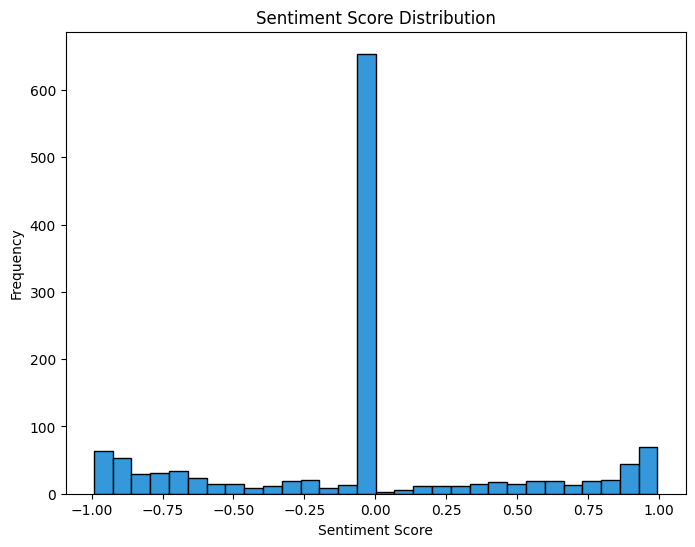

In [ ]:
import matplotlib.pyplot as plt
# Plot histogram of sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(df['score'], bins=30, color='#3498db', edgecolor='black')
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


#2. Topic Distribution Across Comments (Bar Chart)


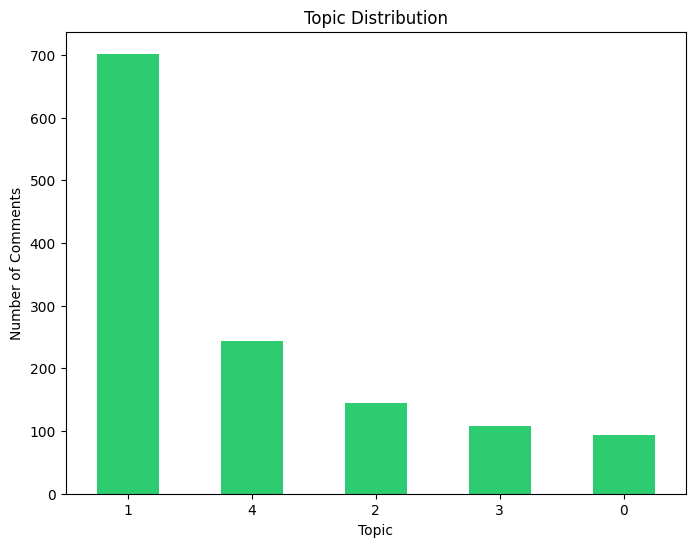

In [ ]:
# Plot the distribution of dominant topics
topic_counts = df['dominant_topic'].value_counts()

plt.figure(figsize=(8, 6))
topic_counts.plot(kind='bar', color='#2ecc71')
plt.title("Topic Distribution")
plt.xlabel("Topic")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.show()


#Advance
#1. Word Cloud for Top Words in a Topic


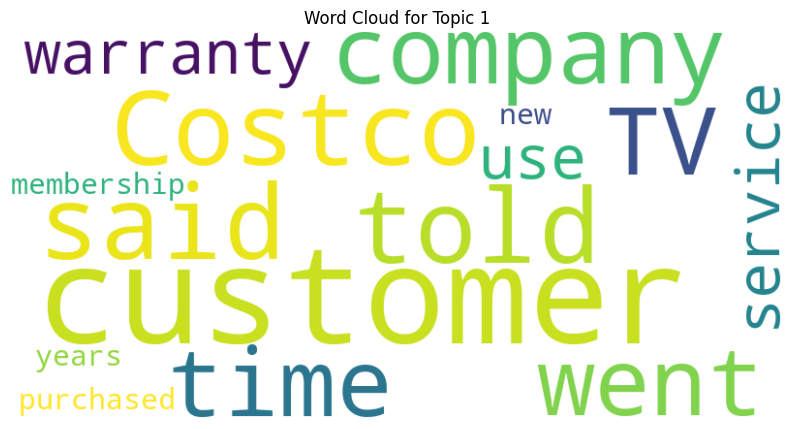

In [ ]:
from wordcloud import WordCloud

# Get the words for the first topic
topic_1_words = lda_model.get_topic_terms(0, topn=20)
words = [lda_model.id2word[word_id] for word_id, _ in topic_1_words]

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Topic 1")
plt.axis('off')
plt.show()


#2. Word Frequency Distribution (Bar Plot)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


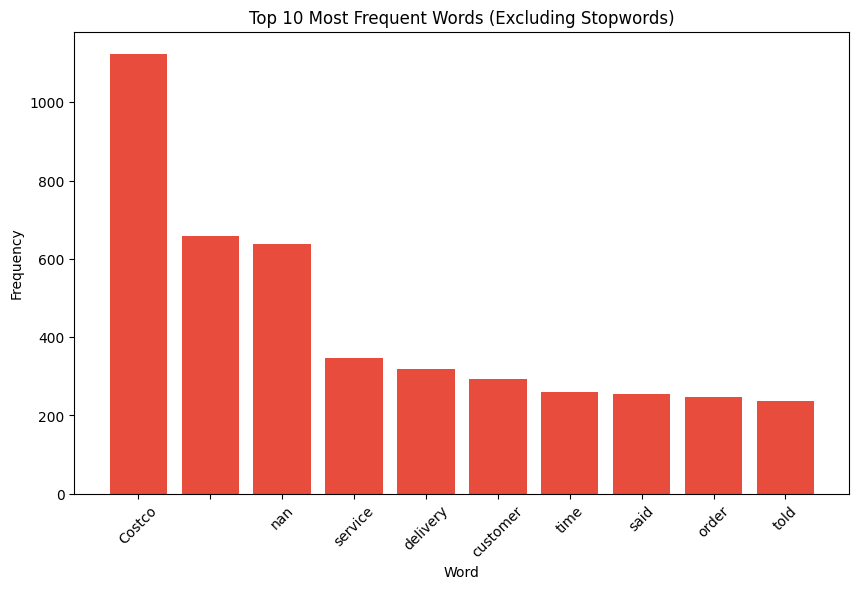

In [ ]:
from collections import Counter
import nltk
nltk.download('stopwords')

# Flatten all tokenized comments into a single list
all_tokens = [word for tokens in df['tokens_cleaned'] for word in tokens]
word_counts = Counter(all_tokens)

# Remove stopwords from the word counts
stopwords = set(nltk.corpus.stopwords.words('english'))
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stopwords}

# Plot top 10 most frequent words
top_words = dict(sorted(filtered_word_counts.items(), key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values(), color='#e74c3c')
plt.title("Top 10 Most Frequent Words (Excluding Stopwords)")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


#3. Topic Word Contributions Visualization (Stacked Bar Chart)


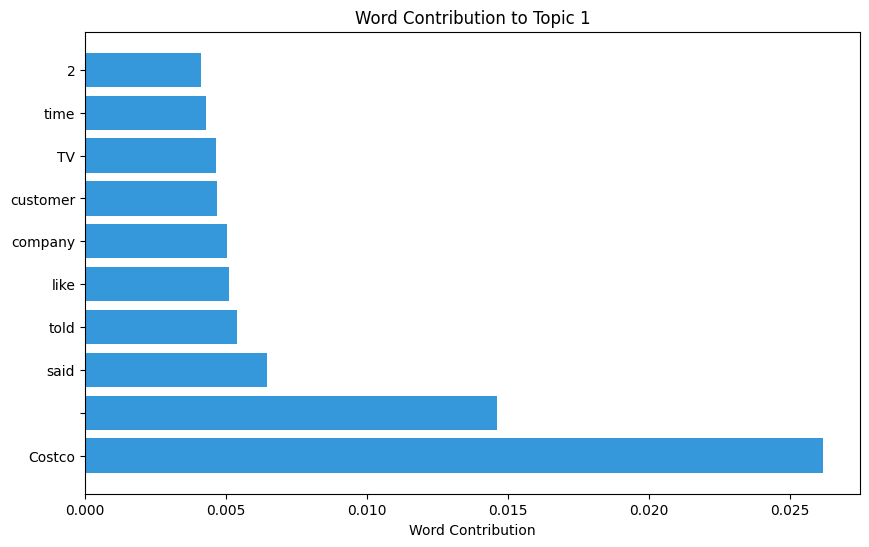

In [ ]:
import numpy as np

# Get the word contributions for the first topic
topic_1_terms = lda_model.get_topic_terms(0, topn=10)
words = [lda_model.id2word[word_id] for word_id, _ in topic_1_terms]
contributions = [prob for _, prob in topic_1_terms]

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(words, contributions, color='#3498db')
ax.set_xlabel("Word Contribution")
ax.set_title("Word Contribution to Topic 1")

plt.show()


#4. 3D Visualization of Topic Modeling (LDA)


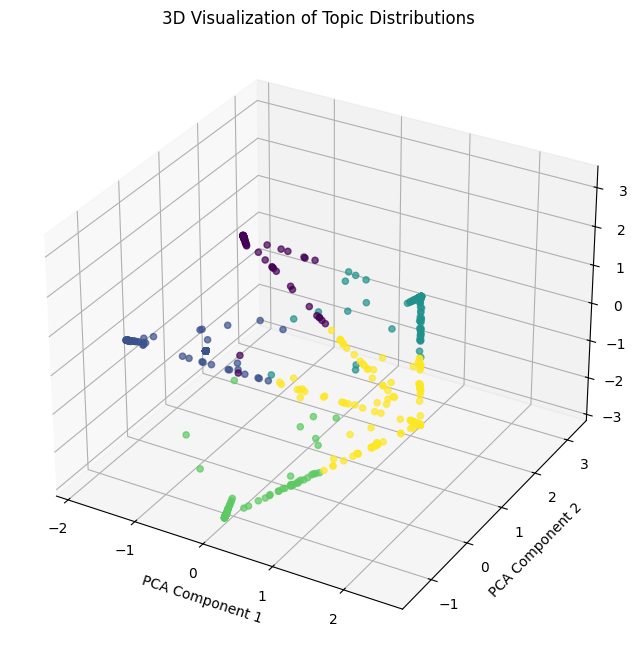

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Get topic distributions for each document
topic_matrix = [lda_model.get_document_topics(doc) for doc in corpus]

# Create a fixed-length topic distribution vector (with 0 for missing topics)
num_topics = lda_model.num_topics  # Number of topics in your model (e.g., 5)
padded_topic_matrix = []

for doc in topic_matrix:
    # Create a vector of zeros for the topics
    doc_vector = [0] * num_topics
    for topic_id, prob in doc:
        doc_vector[topic_id] = prob  # Set the probability for the existing topic
    padded_topic_matrix.append(doc_vector)

# Convert the list of padded topic distributions into a NumPy array
topic_matrix_scaled = np.array(padded_topic_matrix)

# Standardize the data
scaler = StandardScaler()
topic_matrix_scaled = scaler.fit_transform(topic_matrix_scaled)

# Apply PCA to reduce dimensions to 3
pca = PCA(n_components=3)
pca_result = pca.fit_transform(topic_matrix_scaled)

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on the dominant topic
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=df['dominant_topic'], cmap='viridis', alpha=0.7)
ax.set_title('3D Visualization of Topic Distributions')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.show()
